In [1]:
import sys
import os
import matplotlib.pyplot as plt 


sys.path.append(os.path.abspath('../src'))

In [88]:
from networks import run_single_network, create_random_network
from utils import plot_raster, plot_adjacency_matrix
import numpy as np

In [89]:
neurons, G = create_random_network(N=500, p_connect=0.1, weight_bounds=(0.1,5))

In [90]:
from attack import run_attack_batch_stdp, run_attack_batch_stdp_control
import jax.numpy as jnp

In [ ]:
neurons, G = create_random_network(N=500, p_connect=0.1, weight_bounds=(0.1,5))

dt = 0.25
T_global = 2000
steps = int(T_global / dt)
I_ext = jnp.ones((steps, 500)) * 10

results = run_attack_batch_stdp(
        [G], 
        [neurons], 
        I_ext, 10, attack_fraction=0.1, nkey=42, save_path=False )


Batched execution completed stdp, i:0


In [15]:
step_data = results[0][0]

In [16]:
step_data.keys()

dict_keys(['pruned_S_hist_batch', 'base_S_hist', 'base_driver_fraction', 'batch_driver_fraction', 'W0', 'removed_ids', 'neuron_type'])

In [17]:
W0 = np.array(step_data['W0'])
neuron_type = np.array(step_data['neuron_type'])


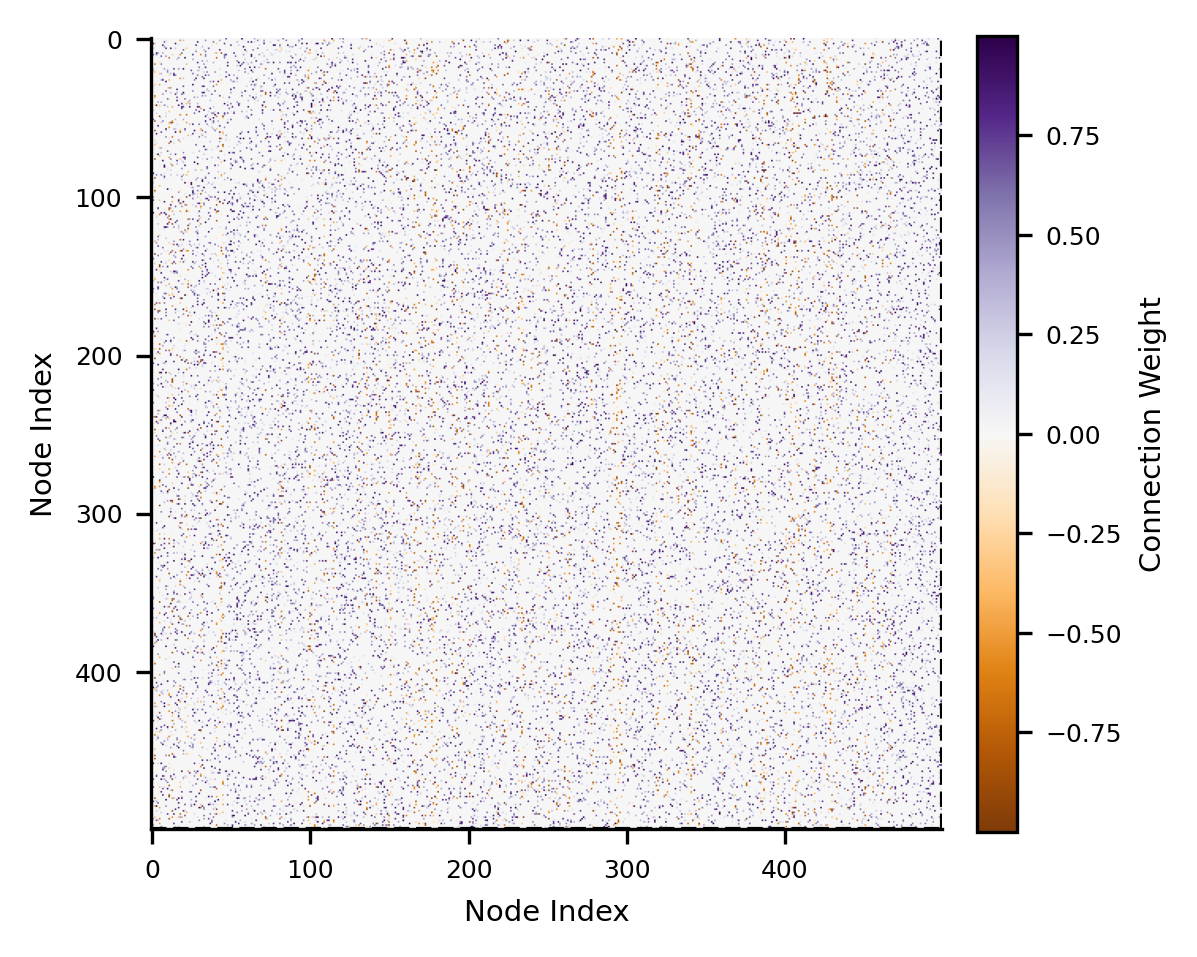

In [18]:
_  = plot_adjacency_matrix(W0)


In [19]:
import networkx as nx 
w_test = nx.to_numpy_array(G)
# Strict elementwise equality
np.array_equal(W0, w_test.T)

True

(<Figure size 1440x450 with 1 Axes>,
 <Axes: title={'center': 'Spike raster'}, xlabel='Time (ms)', ylabel='Neuron ID'>,
 {'col_order': array([  0,   1,   3,   4,   6,   7,   8,   9,  10,  12,  14,  15,  16,
          17,  19,  20,  21,  24,  25,  26,  27,  28,  29,  30,  32,  33,
          34,  35,  36,  37,  38,  39,  40,  42,  43,  46,  47,  48,  49,
          50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
          63,  64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  76,
          77,  78,  79,  80,  81,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 104, 105, 106,
         107, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121,
         122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135,
         137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 152,
         153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 168,
         170, 171, 172, 174, 175, 176, 179, 182, 183,

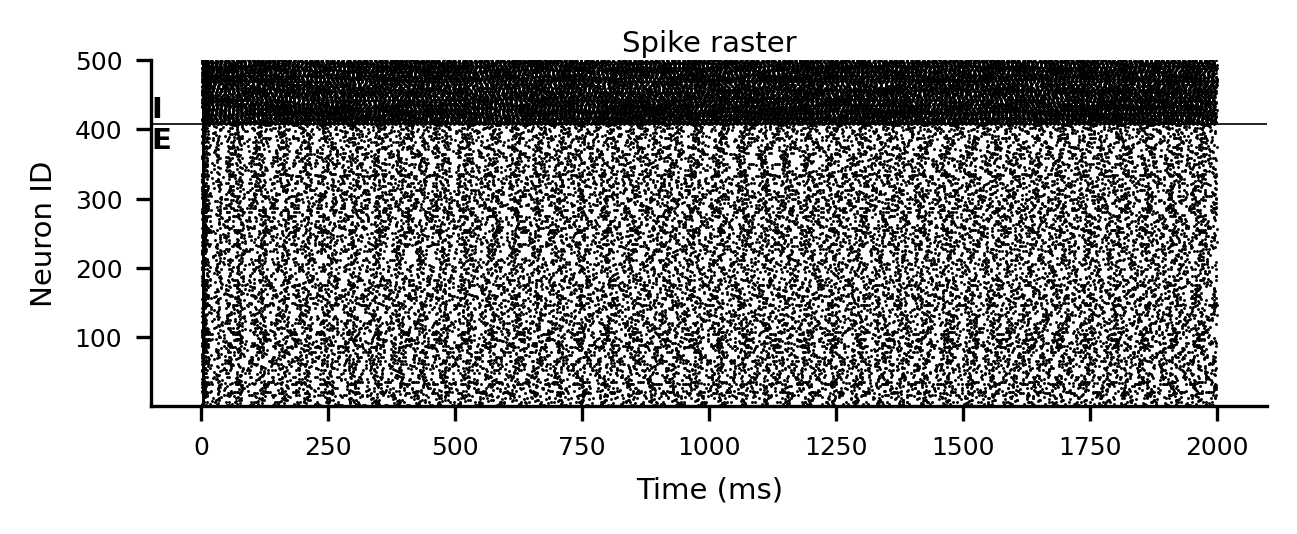

In [20]:
plot_raster(step_data['base_S_hist'], neurons, W0, T_total=2000)

In [21]:
step_data['base_driver_fraction']

array([0.02496808], dtype=float32)

In [22]:
step_data['batch_driver_fraction']

array([0.021499  , 0.02189554, 0.02200372, 0.02165691, 0.02146218,
       0.02204493, 0.0216929 , 0.02206401, 0.02187362, 0.02140563],
      dtype=float32)

In [ ]:
dt = 0.25
T_global = 2000
steps = int(T_global / dt)
I_ext = jnp.ones((steps, 500)) * 10

results = run_attack_batch_stdp_control(
        [G], 
        [neurons], 
        I_ext, 10, attack_fraction=0.1, nkey=465, save_path=False )

step_data = results[0][0]

Batched execution completed stdp, i:0


In [24]:
step_data = results[0][0]

(<Figure size 1440x450 with 1 Axes>,
 <Axes: title={'center': 'Spike raster'}, xlabel='Time (ms)', ylabel='Neuron ID'>,
 {'col_order': array([  0,   1,   3,   4,   6,   7,   8,   9,  10,  12,  14,  15,  16,
          17,  19,  20,  21,  24,  25,  26,  27,  28,  29,  30,  32,  33,
          34,  35,  36,  37,  38,  39,  40,  42,  43,  46,  47,  48,  49,
          50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
          63,  64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  76,
          77,  78,  79,  80,  81,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 104, 105, 106,
         107, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121,
         122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135,
         137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 152,
         153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 168,
         170, 171, 172, 174, 175, 176, 179, 182, 183,

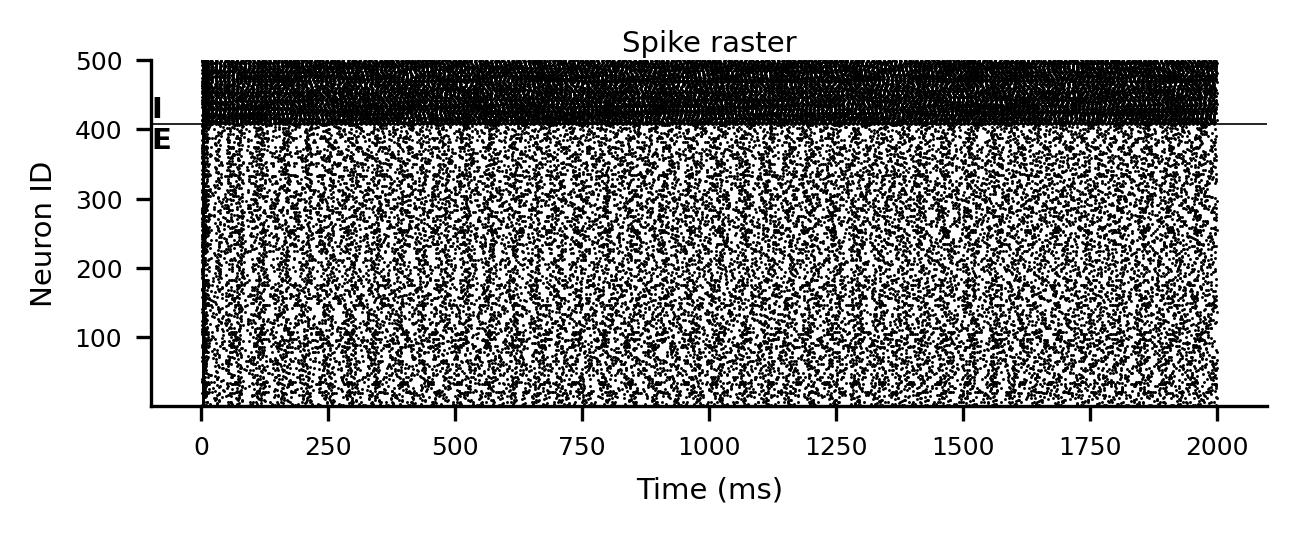

In [25]:
plot_raster(step_data['base_S_hist'], neurons, W0, T_total=T_global)

In [27]:
step_data.keys()

dict_keys(['pruned_S_hist_batch', 'base_S_hist', 'base_driver_fraction', 'batch_driver_fraction', 'W0', 'removed_ids', 'neuron_type'])

(<Figure size 1440x450 with 1 Axes>,
 <Axes: title={'center': 'Spike raster'}, xlabel='Time (ms)', ylabel='Neuron ID'>,
 {'col_order': array([  0,   1,   3,   4,   6,   7,   8,   9,  10,  12,  14,  15,  16,
          17,  19,  20,  21,  24,  25,  26,  27,  28,  29,  30,  32,  33,
          34,  35,  36,  37,  38,  39,  40,  42,  43,  46,  47,  48,  49,
          50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
          63,  64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  76,
          77,  78,  79,  80,  81,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 104, 105, 106,
         107, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121,
         122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135,
         137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 152,
         153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 168,
         170, 171, 172, 174, 175, 176, 179, 182, 183,

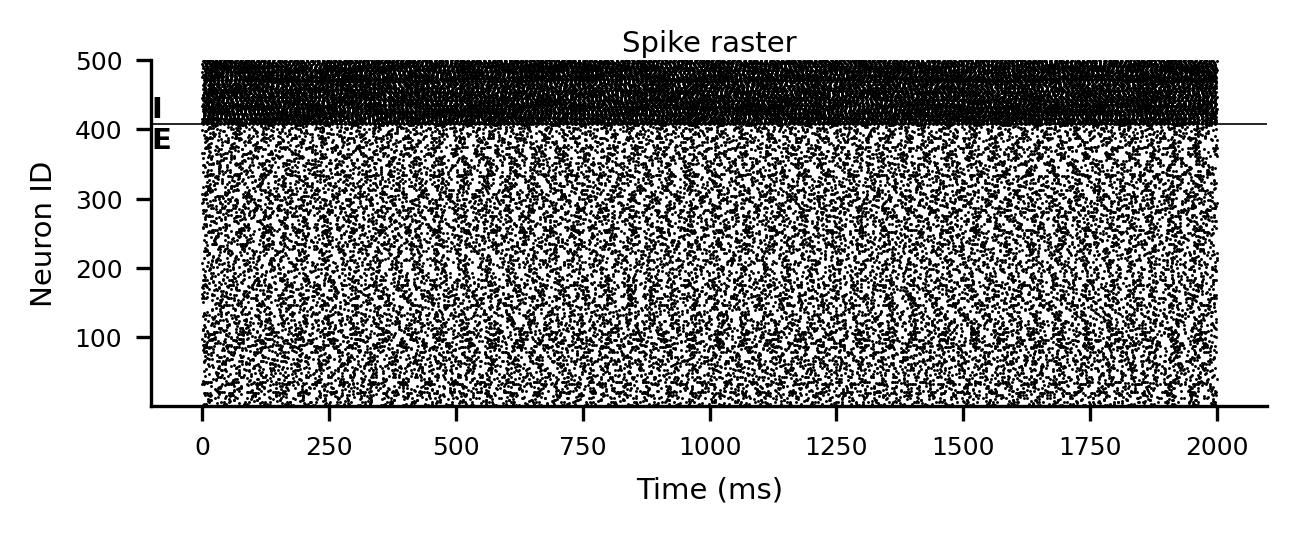

In [28]:
plot_raster(step_data['pruned_S_hist_batch'], neurons, W0, T_total=T_global)

In [69]:
import numpy as np
import infomeasure as im
import antropy as ant
import numpy as np
import networkx as nx

im_args = {"approach": "miller_madow", "base": 2}

def keep_indices(remove_idx: np.ndarray, N: int) -> np.ndarray:
    """Return fixed-size (N-k,) indices to keep. O(N)."""
    k = remove_idx.shape[0]
    # mask: True for keep, False for remove
    mask = np.ones((N,), dtype=bool)
    mask[remove_idx] = False
    # Grab exactly N-k kept indices, preserving order (left→right).
    keep_idx = np.nonzero(mask)[0]  # (N-k,)
    return keep_idx

def _take_vec(x: np.ndarray, idx: np.ndarray) -> np.ndarray:
    return np.take(x, idx, axis=0)

def _take_square(M: np.ndarray, idx: np.ndarray) -> np.ndarray:
    M1 = np.take(M, idx, axis=0)
    M2 = np.take(M1, idx, axis=1)
    return M2

from tqdm import tqdm
import numpy as np

def compute_post_batch_entropies(step_data, N, test_fraction, keep_indices, 
                                 step_size=500, n_batches=10, 
                                 im_args=None, T_total=4000, window_size=None, control=True):
    """
    Compute post-batch entropies and times.

    Parameters
    ----------
    step_data : dict
        Contains 'base_S_hist', 'pruned_S_hist_batch', and 'removed_ids'.
    N : int
        Total number of nodes.
    test_fraction : int
        Window size for entropy calculation.
    keep_indices : callable
        Function to compute surviving node indices given removed_ids and N.
    step_size : int, optional
        Step size for sliding window. Default is 500.
    n_batches : int, optional
        Number of batches. Default is 10.
    im_args : dict, optional
        Arguments to pass to im.entropy. Default is Miller-Madow with base 2.
    T_total : int, optional
        Total experiment duration. Default is 4000.

    Returns
    -------
    post_batch_entropies : list of list of float
    post_batch_times : list of list of float
    """

    if im_args is None:
        im_args = {"approach": "miller_madow", "base": 2}

    post_batch_entropies = []
    post_batch_times = []
    if window_size is None:
        window_size = test_fraction

    for batch in range(n_batches):
        entropies = []
        times = []

        if control:
            S_hist_R = np.array(step_data['pruned_S_hist_batch'])
        else:
            S_hist_R = np.array(step_data['pruned_S_hist_batch'][batch])

        S_hist = np.array(step_data['base_S_hist'])
        removed_ids = np.array(step_data['removed_ids'][batch])

        surviving_nodes = keep_indices(removed_ids, N)

        A = S_hist[:, surviving_nodes]
        if control:
            B = S_hist_R[:, surviving_nodes]
        else:
            B = S_hist_R

        A = np.concatenate([A, B], axis=0)

        # Build time axis
        T = A.shape[0]
        dt = T_total / T
        real_time_axis = np.arange(T) * dt

        for start in tqdm(range(0, T - window_size + 1, step_size), desc=f"Batch {batch+1}/{n_batches}"):
            window = A[start:start+window_size]
            H = im.entropy(window, **im_args)
            entropies.append(H)

            centre_idx = start + window_size // 2
            times.append(real_time_axis[centre_idx])

        post_batch_entropies.append(entropies)
        post_batch_times.append(times)

    return post_batch_entropies, post_batch_times

import numpy as np

def bootstrap_entropy_statistics(post_batch_entropies, n_boot=10000, ci=95, seed=42):
    """
    Compute mean entropy and bootstrap confidence intervals across batches.

    Parameters
    ----------
    post_batch_entropies : list of list of float
        Entropy values from multiple batches, each possibly of different length.
    n_boot : int, optional
        Number of bootstrap samples. Default is 10000.
    ci : float, optional
        Confidence interval width in percent. Default is 95.
    seed : int, optional
        Random seed for reproducibility. Default is 42.

    Returns
    -------
    means : np.ndarray
        Mean entropy values at each timepoint (with NaN padding if needed).
    cis_low : np.ndarray
        Lower confidence interval bound at each timepoint.
    cis_high : np.ndarray
        Upper confidence interval bound at each timepoint.
    """

    # Pad to common length
    max_len = max(len(x) for x in post_batch_entropies)
    entropy_mat = np.full((len(post_batch_entropies), max_len), np.nan)
    for i, arr in enumerate(post_batch_entropies):
        entropy_mat[i, :len(arr)] = arr

    # Compute mean
    means = np.nanmean(entropy_mat, axis=0)

    # Bootstrap CIs
    alpha = (100 - ci) / 2
    cis_low = []
    cis_high = []

    rng = np.random.default_rng(seed=seed)
    for t in range(entropy_mat.shape[1]):
        vals = entropy_mat[:, t]
        vals = vals[~np.isnan(vals)]
        if len(vals) == 0:
            cis_low.append(np.nan)
            cis_high.append(np.nan)
            continue

        boots = rng.choice(vals, size=(n_boot, len(vals)), replace=True)
        boots_mean = np.mean(boots, axis=1)
        cis_low.append(np.percentile(boots_mean, alpha))
        cis_high.append(np.percentile(boots_mean, 100 - alpha))

    return means, np.array(cis_low), np.array(cis_high)

import matplotlib.pyplot as plt
import numpy as np

def plot_entropy_results(post_batch_entropies, post_batch_times, means, cis_low, cis_high, 
                         window_size, step_size, ci_label="95% CI", 
                         intervention_time=2000, figsize=(5, 2)):
    """
    Plot entropy results with bootstrap confidence intervals.

    Parameters
    ----------
    post_batch_entropies : list of list of float
        Entropy values per batch.
    post_batch_times : list of list of float
        Time axes per batch (must align).
    means : np.ndarray
        Mean entropy across batches at each timepoint.
    cis_low : np.ndarray
        Lower confidence interval bounds.
    cis_high : np.ndarray
        Upper confidence interval bounds.
    window_size : int
        Window size (used for annotation).
    step_size : int
        Step size (used for annotation).
    ci_label : str, optional
        Label for CI region in legend. Default is "95% CI".
    intervention_time : float, optional
        Time at which to draw a vertical dashed line. Default is 2000.
    figsize : tuple, optional
        Size of the matplotlib figure. Default is (5, 2).
    """

    # Use the time axis from the first batch (assumes alignment)
    max_len = len(means)
    time_axis = post_batch_times[0][:max_len]

    # Annotation string
    params_text = f"window = {window_size*0.25:.1f} ms\nstep = {step_size*0.25:.1f} ms"

    plt.figure(figsize=figsize)

    # Plot all individual batches
    for batch_times, batch_ents in zip(post_batch_times, post_batch_entropies):
        plt.plot(batch_times, batch_ents, color='C0', alpha=0.1, zorder=0, linewidth=1)

    # Plot mean + CI
    plt.plot(time_axis, means, color='C0', label='Mean', zorder=9)
    plt.fill_between(time_axis, cis_low, cis_high, color='C0', alpha=0.3, label=ci_label, zorder=8)

    # Labels and formatting
    plt.xlabel("Time (centre of window)")
    plt.ylabel("Entropy (bits)")
    plt.axvline(intervention_time, color='red', linestyle='--')

    # Add parameter annotation box
    plt.text(
        0.95, 0.05, params_text,
        transform=plt.gca().transAxes,
        ha='right', va='bottom',
        fontsize=6,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.3')
    )

    plt.title("Running window entropy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [105]:
import infomeasure as im
import antropy as ant
import numpy as np
import networkx as nx

im_args = {"approach": "miller_madow", "base": 2}
batch = 0
fraction = 0.33
N = 500

S_hist = np.array(step_data['base_S_hist'])
S_hist_R = np.array(step_data['pruned_S_hist_batch'])
removed_ids = np.array(step_data['removed_ids'][batch])

test_fraction = int(len(S_hist) * fraction)

surviving_nodes = keep_indices(removed_ids, N)
A = S_hist[-test_fraction:, surviving_nodes]
B = S_hist_R[:test_fraction, surviving_nodes]
C = S_hist_R[-test_fraction:, surviving_nodes]

# Entropy of network microstates (rows = time, columns = neurons)
h_A = im.entropy(A, **im_args)
h_B = im.entropy(B, **im_args)
h_C = im.entropy(C, **im_args)
print(h_A, h_B, h_C)

ValueError: Data array must be 1D or 2D.

In [106]:
neurons, G = create_random_network(N=500, p_connect=0.01, weight_bounds=(0.1,100))


In [154]:
dt = 0.25
T_global = 2000
steps = int(T_global / dt)
I_ext = jnp.ones((steps, 500)) * 10

results = run_attack_batch_stdp_control(
        [G], 
        [neurons], 
        I_ext, 10, attack_fraction=0.2, nkey=465, save_path=False )

step_data = results[0][0]

Batched execution completed stdp, i:0


Batch 10/10: 100%|██████████| 63/63 [00:00<00:00, 186.12it/s]


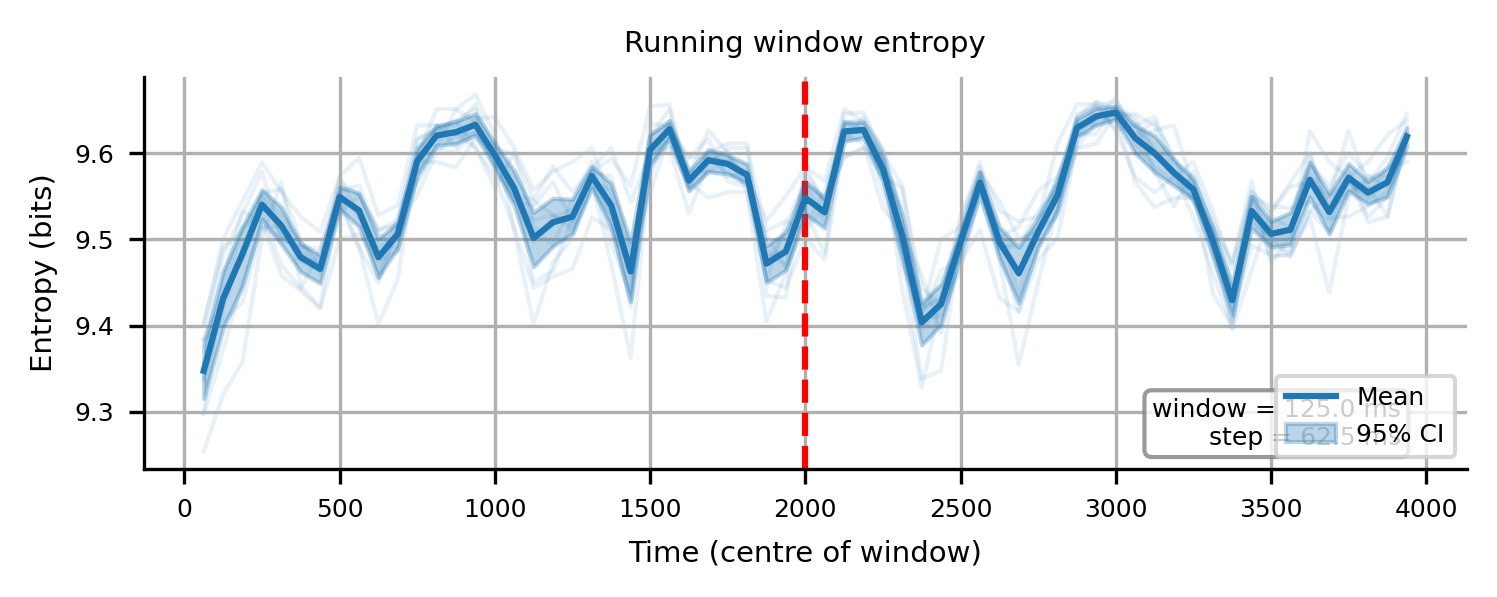

In [155]:
window_size = 500
step_size = 250
post_batch_entropies, post_batch_times = compute_post_batch_entropies(step_data, N, test_fraction, keep_indices,
                                                                      window_size=window_size, step_size=step_size)
means, cis_low, cis_high = bootstrap_entropy_statistics(post_batch_entropies)

plot_entropy_results(post_batch_entropies, post_batch_times, means, cis_low, cis_high, 
                     window_size=window_size, step_size=step_size)


In [156]:
import infomeasure as im
import antropy as ant
import numpy as np
import networkx as nx
from measures import entropic_measures

im_args = {"approach": "miller_madow", "base": 2}
batch = 0
fraction = 0.33
N = 500

S_hist = np.array(step_data['base_S_hist'])

e_results = []
for batch in range(10):
    removed_ids = np.array(step_data['removed_ids'][batch])
    surviving_nodes = keep_indices(removed_ids, N)
    S_hist_R = np.array(step_data['pruned_S_hist_batch'][:, surviving_nodes])
    results = entropic_measures(S_hist, S_hist_R, surviving_nodes,  fraction=fraction)

    e_results.append(results)


In [164]:
from multiprocessing import Pool

def compute(batch):
    removed_ids = np.array(step_data['removed_ids'][batch])
    surviving_nodes = keep_indices(removed_ids, N)
    S_hist_R = np.array(step_data['pruned_S_hist_batch'][:, surviving_nodes])
    return entropic_measures(S_hist, S_hist_R, surviving_nodes, fraction=fraction)

with Pool(processes=4) as pool:  # limit cores
    e_results = list(pool.map(compute, range(10)))


Process SpawnPoolWorker-2:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/mauffee/.local/share/mamba/envs/myenv/lib/python3.13/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
    ~~~~~~~~^^
  File "/Users/mauffee/.local/share/mamba/envs/myenv/lib/python3.13/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
    ~~~~~~~~^^
  File "/Users/mauffee/.local/share/mamba/envs/myenv/lib/python3.13/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mauffee/.local/share/mamba/envs/myenv/lib/python3.13/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mauffee/.local/share/ma

KeyboardInterrupt: 

In [159]:
import pandas as pd

edf = pd.DataFrame(e_results, columns=['h_A', 'h_B', 'h_C', 'mi_AB', 'mi_AC', 'mi_AA'])
edf

,h_A,h_B,h_C,mi_AB,mi_AC,mi_AA
0,11.831126,11.774690,11.816610,11.522270,11.562688,11.831126
1,11.829646,11.772377,11.829523,11.516688,11.572803,11.829646
2,11.818882,11.805246,11.833046,11.536732,11.565563,11.818882
3,11.831039,11.787093,11.798631,11.534585,11.544620,11.831039
4,11.820991,11.776682,11.805962,11.510276,11.541905,11.820991
5,11.826171,11.726255,11.777630,11.465030,11.518752,11.826171
6,11.794347,11.770731,11.820760,11.481532,11.528741,11.794347
7,11.816614,11.736906,11.770970,11.467154,11.500187,11.816614
8,11.872968,11.775412,11.836850,11.560984,11.622422,11.872968
9,11.808096,11.735169,11.808328,11.459718,11.530058,11.808096


In [160]:
e_data = {}
for col in edf.columns:
    e_data[col] = bootstrap_entropy_statistics(edf[col].to_numpy().reshape(-1,1))



In [162]:
dt = 0.25
T_global = 2000
steps = int(T_global / dt)
I_ext = jnp.ones((steps, 500)) * 10

results = run_attack_batch_stdp(
        [G], 
        [neurons], 
        I_ext, 10, attack_fraction=0.2, nkey=42, save_path=False )
step_data = results[0][0]

Batched execution completed stdp, i:0


Batch 10/10: 100%|██████████| 63/63 [00:00<00:00, 186.87it/s]


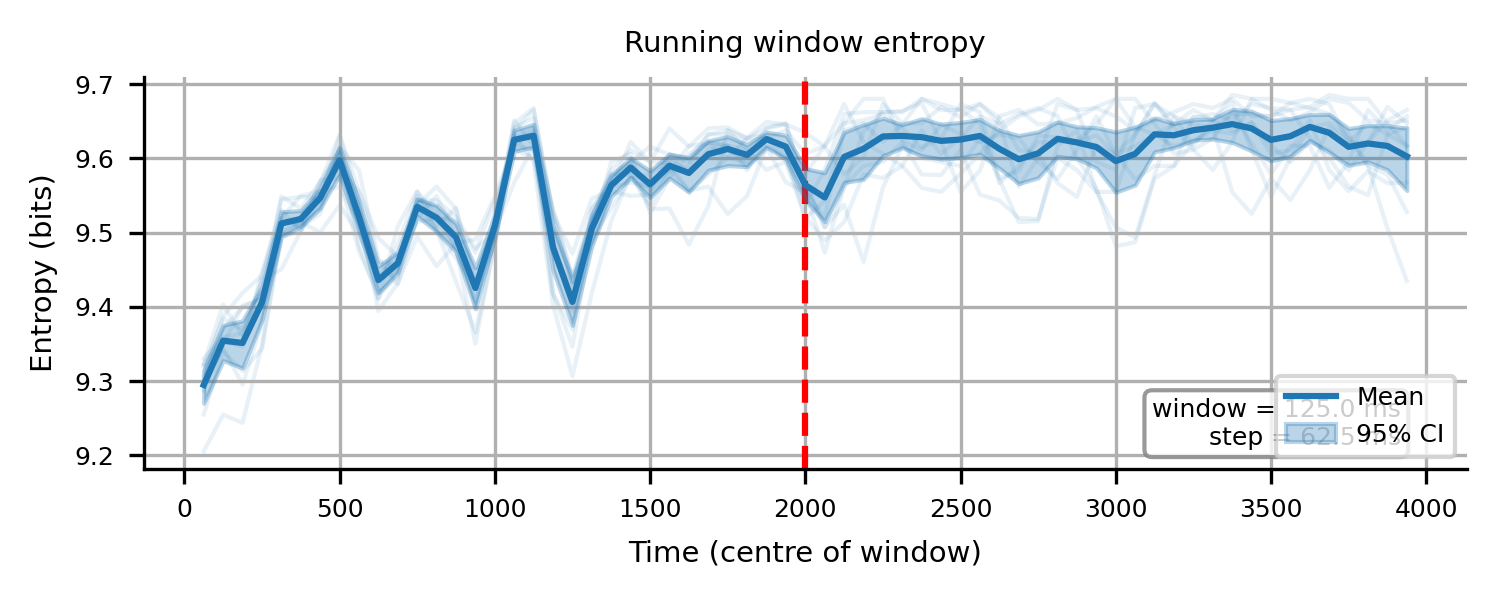

In [163]:
window_size = 500
step_size = 250
post_batch_entropies, post_batch_times = compute_post_batch_entropies(step_data, N, test_fraction, keep_indices,
                                                                      window_size=window_size, step_size=step_size, control=False)
means, cis_low, cis_high = bootstrap_entropy_statistics(post_batch_entropies)

plot_entropy_results(post_batch_entropies, post_batch_times, means, cis_low, cis_high, 
                     window_size=window_size, step_size=step_size)

In [139]:
S_hist = np.array(step_data['base_S_hist'])

e_results = []
for batch in range(10):
    removed_ids = np.array(step_data['removed_ids'][batch])
    surviving_nodes = keep_indices(removed_ids, N)
    S_hist_R = np.array(step_data['pruned_S_hist_batch'][batch])
    results = entropic_measures(S_hist, S_hist_R, surviving_nodes,  fraction=fraction)

    e_results.append(results)

In [140]:

edf = pd.DataFrame(e_results, columns=['h_A', 'h_B', 'h_C'])
edf

,h_A,h_B,h_C
0,11.856077,11.843850,11.953603
1,11.914072,11.948278,11.973277
2,11.898526,11.886048,11.965193
3,11.903345,11.918374,11.941379
4,11.853893,11.971264,11.901322
5,11.914389,11.977707,12.030146
6,11.913939,11.967432,12.024952
7,11.950538,11.985056,12.031450
8,11.950069,11.840565,11.951273
9,11.906283,11.976289,11.905519


In [141]:
bh_A = bootstrap_entropy_statistics(edf['h_A'].to_numpy().reshape(-1,1))
bh_B  = bootstrap_entropy_statistics(edf['h_B'].to_numpy().reshape(-1,1))
bh_C = bootstrap_entropy_statistics(edf['h_C'].to_numpy().reshape(-1,1))


In [145]:
bh_C

(array([11.96781133]), array([11.94019011]), array([11.99619716]))

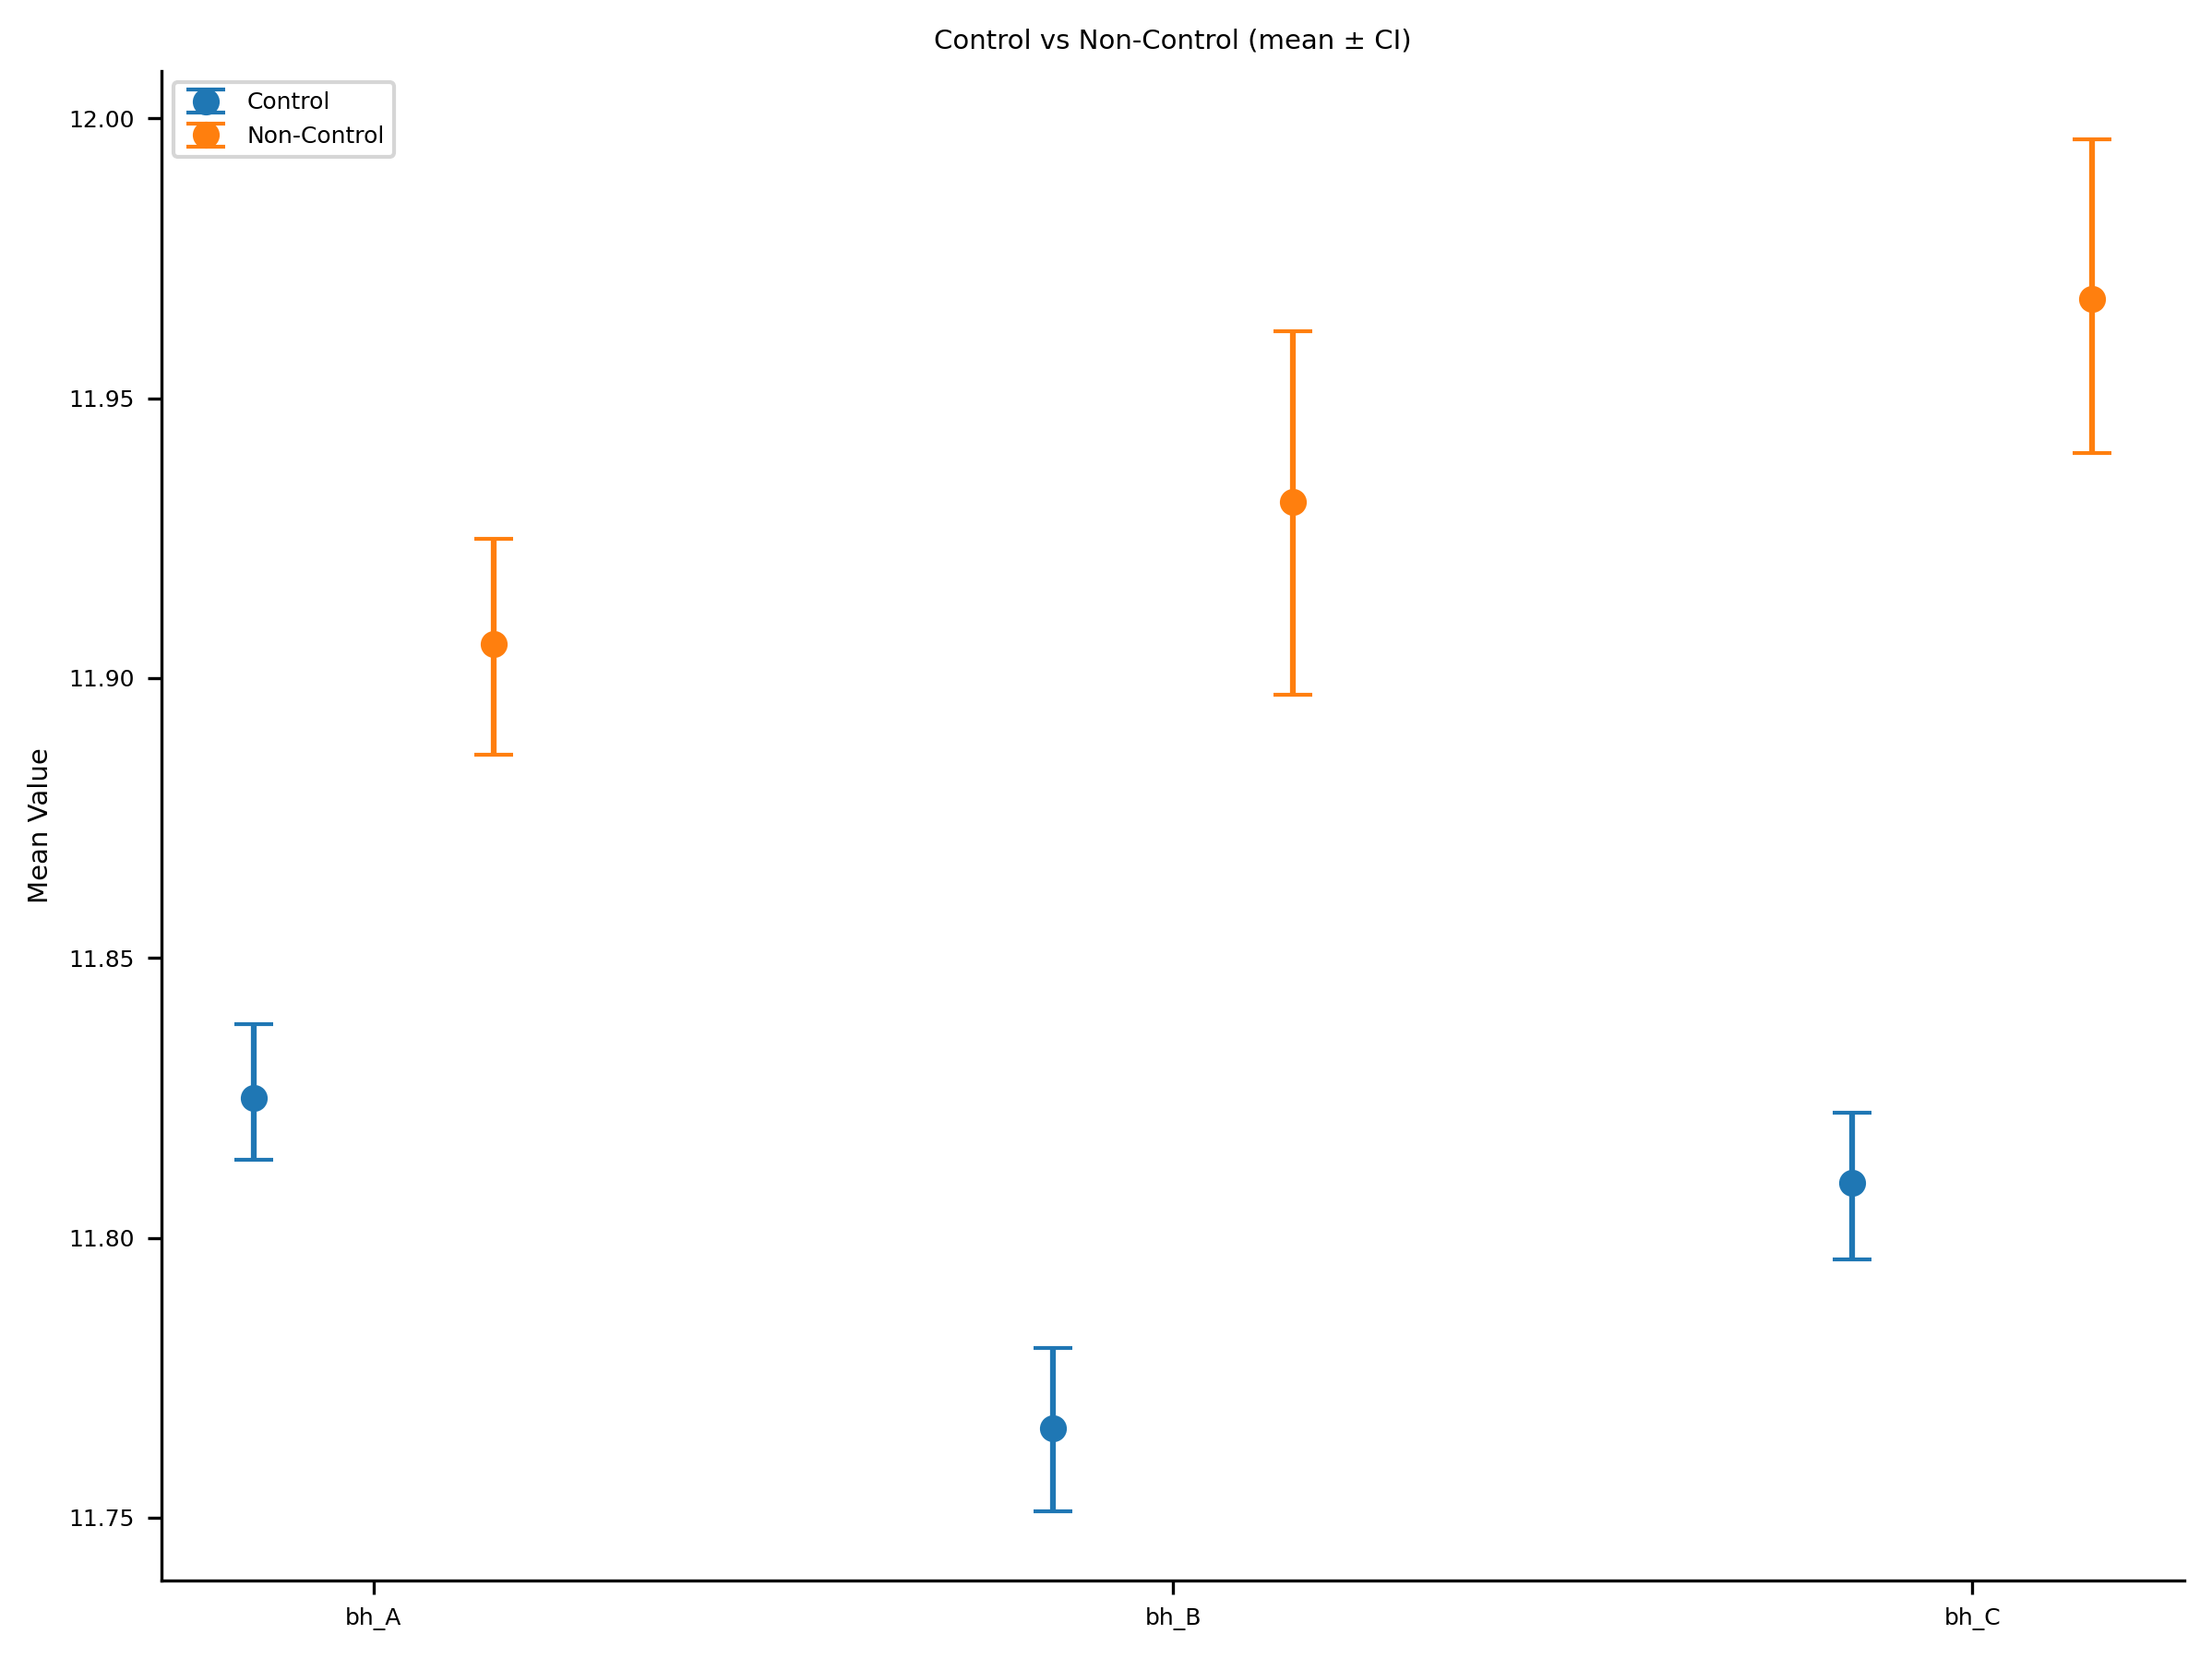

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Example variables (yours already exist)
# bh_A = (np.array([11.96781133]), np.array([11.94019011]), np.array([11.99619716]))
# bh_A_control = ...

data = {
    "bh_A": bh_A,
    "bh_B": bh_B,
    "bh_C": bh_C
}

data_control = {
    "bh_A": bh_A_control,
    "bh_B": bh_B_control,
    "bh_C": bh_C_control
}

groups = list(data.keys())
n_groups = len(groups)

def unpack(t):
    return (t[0].item(), t[1].item(), t[2].item())

means_noncontrol = []
errors_noncontrol = []
means_control = []
errors_control = []

for g in groups:
    m, low, high = unpack(data[g])
    means_noncontrol.append(m)
    errors_noncontrol.append((m - low, high - m))

    m_c, low_c, high_c = unpack(data_control[g])
    means_control.append(m_c)
    errors_control.append((m_c - low_c, high_c - m_c))

# Convert to numpy arrays for matplotlib
yerr_noncontrol = np.array(errors_noncontrol).T
yerr_control = np.array(errors_control).T

x = np.arange(n_groups)
offset = 0.15  # slight horizontal offset for clarity

fig, ax = plt.subplots(figsize=(8, 6))

# Scatter points with error bars
ax.errorbar(x - offset, means_control, 
            yerr=yerr_control, fmt='o', capsize=5, label="Control", color="tab:blue")

ax.errorbar(x + offset, means_noncontrol, 
            yerr=yerr_noncontrol, fmt='o', capsize=5, label="Non-Control", color="tab:orange")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel("Mean Value")
ax.set_title("Control vs Non-Control (mean ± CI)")
ax.legend()

plt.tight_layout()
plt.show()


In [44]:
S = step_data['pruned_S_hist_batch']